## SHAP

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import shap

shap.initjs()

essays=pd.read_csv("../data/essays_expanded.csv")

essays.head()

,TEXT,cEXT,cNEU,cAGR,cCON,cOPN,words,sentences,bigrams,trigrams,average_word_embedding
0,"Well, right now I just woke up from a mid-day ...",0,1,1,0,1,"['well', 'right', 'now', 'i', 'just', 'woke', ...","['well, right now i just woke up from a mid-da...","[('well', 'right'), ('right', 'now'), ('now', ...","[('well', 'right', 'now'), ('right', 'now', 'i...",[ 1.46904569e-02 1.52049020e-01 -2.17639774e-...
1,"Well, here we go with the stream of consciousn...",0,0,1,0,0,"['well', 'here', 'we', 'go', 'with', 'the', 's...","['well, here we go with the stream of consciou...","[('well', 'here'), ('here', 'we'), ('we', 'go'...","[('well', 'here', 'we'), ('here', 'we', 'go'),...",[ 1.93020366e-02 2.00337350e-01 -2.47012377e-...
2,An open keyboard and buttons to push. The thin...,0,1,0,1,1,"['an', 'open', 'keyboard', 'and', 'buttons', '...","['an open keyboard and buttons to push.', 'the...","[('an', 'open'), ('open', 'keyboard'), ('keybo...","[('an', 'open', 'keyboard'), ('open', 'keyboar...",[ 1.21683925e-02 1.49960428e-01 -2.17856288e-...
3,I can't believe it! It's really happening! M...,1,0,1,1,0,"['i', 'cant', 'believe', 'it', 'its', 'really'...","[""i can't believe it!"", ""it's really happening...","[('i', 'cant'), ('cant', 'believe'), ('believe...","[('i', 'cant', 'believe'), ('cant', 'believe',...",[-1.21900747e-02 1.94802403e-01 -2.04183444e-...
4,"Well, here I go with the good old stream of co...",1,0,1,0,1,"['well', 'here', 'i', 'go', 'with', 'the', 'go...","['well, here i go with the good old stream of ...","[('well', 'here'), ('here', 'i'), ('i', 'go'),...","[('well', 'here', 'i'), ('here', 'i', 'go'), (...",[-6.53621508e-03 1.72239631e-01 -2.12745324e-...


In [37]:
essays_train, essays_test = train_test_split(
    essays[["TEXT", "cEXT", "cOPN", "cAGR", "cCON", "cNEU"]], test_size=0.2, random_state=42
)

count_vectorizer=TfidfVectorizer()

In [38]:
def train_lr(df_train, vectorizer, personality, lr_kwargs={"solver":"liblinear"}): #"max_iter": 1000, "solver": "lbfgs"}):
    """
    Receives the train set `df_train` as pd.DataFrame and extracts lemma n-grams
    with their correspoding labels (news type).
    The text is vectorized and used to train a logistic regression with
    training arguments passed as `lr_kwargs`.
    Returns the fitted model.
    """
    vectorizer.set_params(max_df=df_train.shape[0])
    X=vectorizer.fit_transform(df_train["TEXT"])
    model=LR(**lr_kwargs)
    model.fit(X, df_train[[personality]])
    return model


def train_svm(df_train, vectorizer, personality):
    """
    Receives the train set `df_train` as pd.DataFrame and extracts lemma n-grams
    with their correspoding labels (news type).
    The text is vectorized and used to train a logistic regression with
    training arguments passed as `lr_kwargs`.
    Returns the fitted model.
    """
    vectorizer.set_params(max_df=df_train.shape[0])
    X=vectorizer.fit_transform(df_train["TEXT"])
    model=SVC(C=1,kernel='rbf')
    model.fit(X, df_train[[personality]])
    return model

In [39]:
X_train=count_vectorizer.fit_transform(essays_train["TEXT"])
X_test=count_vectorizer.transform(essays_test["TEXT"])
print(X_train.shape[0])
print(X_test.shape[0])

1973
494


## Extraversion

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


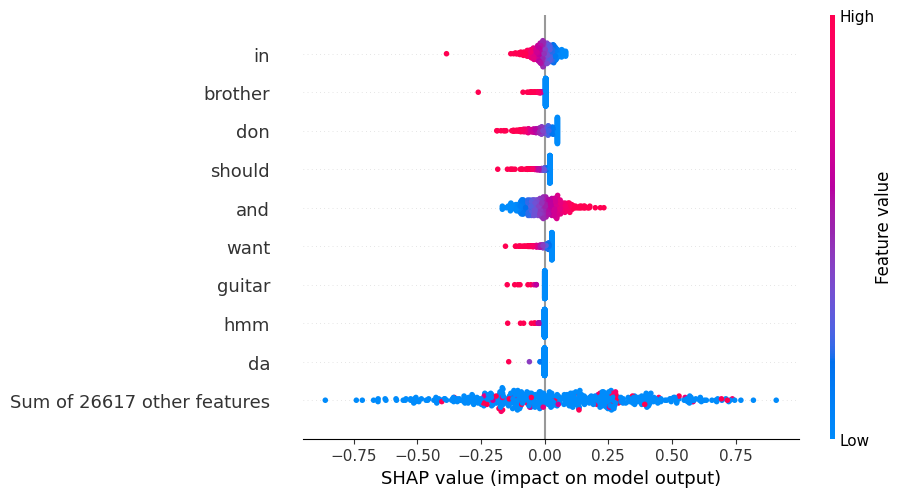

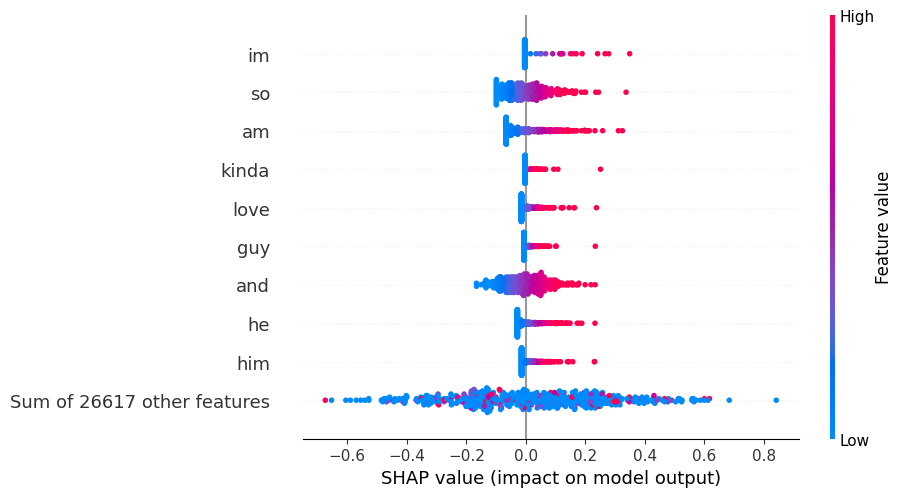

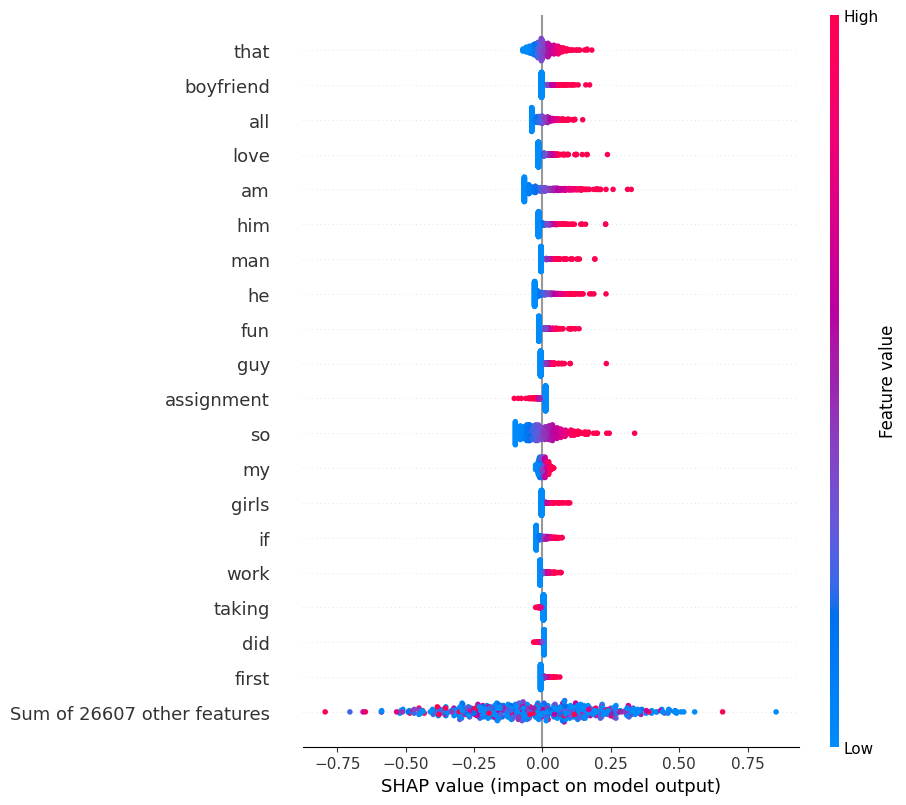

In [40]:
lr = LR(solver="liblinear")

y_train=essays_train["cEXT"]
y_test=essays_test["cEXT"]

lr.fit(X_train, y_train)

explainer = shap.Explainer(lr, X_train, feature_names=count_vectorizer.get_feature_names())
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, max_display=10, order=shap_values.min(0).argsort)
shap.plots.beeswarm(shap_values, max_display=10, order=shap_values.max(0))
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.sum(0))

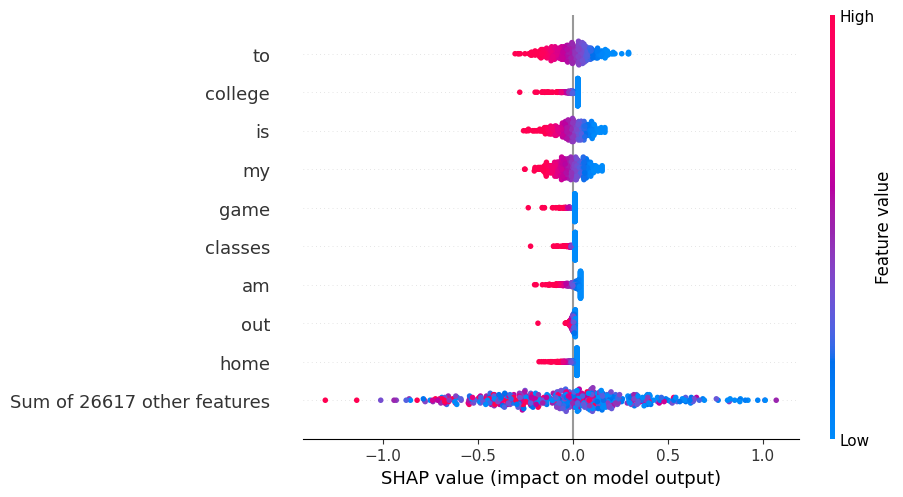

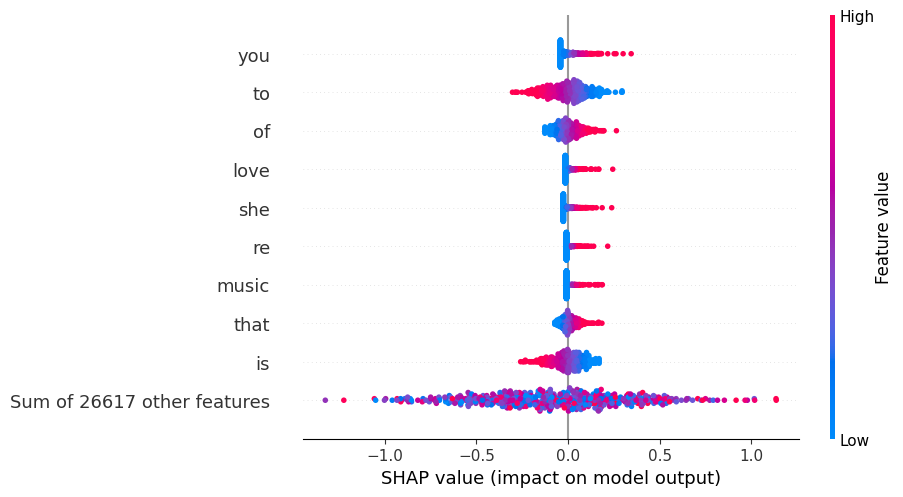

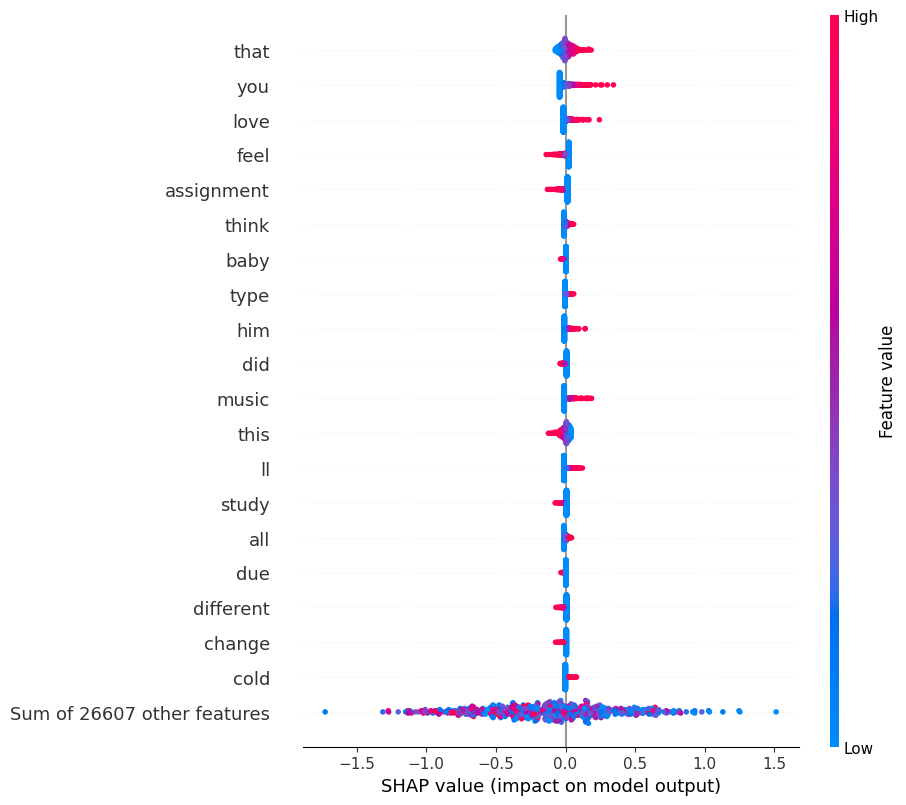

In [41]:
lr = LR(solver="liblinear")

y_train=essays_train["cOPN"]
y_test=essays_test["cOPN"]

lr.fit(X_train, y_train)

explainer = shap.Explainer(lr, X_train, feature_names=count_vectorizer.get_feature_names())
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, max_display=10, order=shap_values.min(0).argsort)
shap.plots.beeswarm(shap_values, max_display=10, order=shap_values.max(0))
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.sum(0))

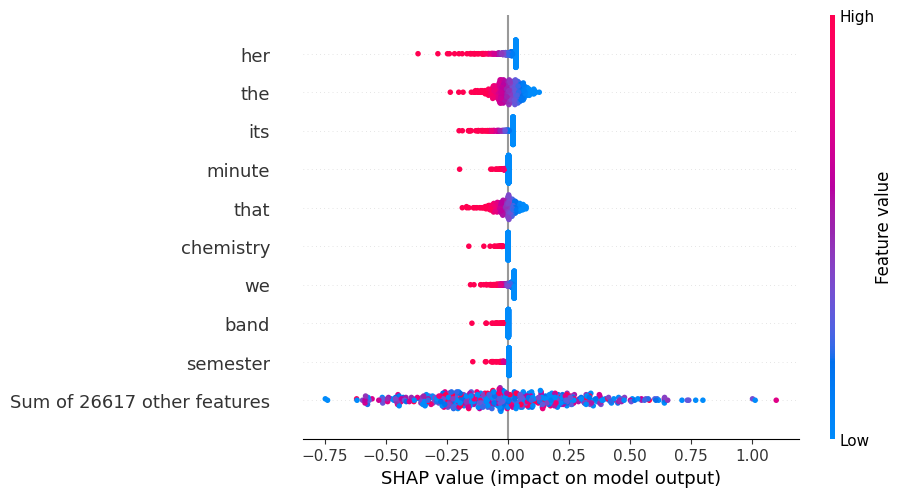

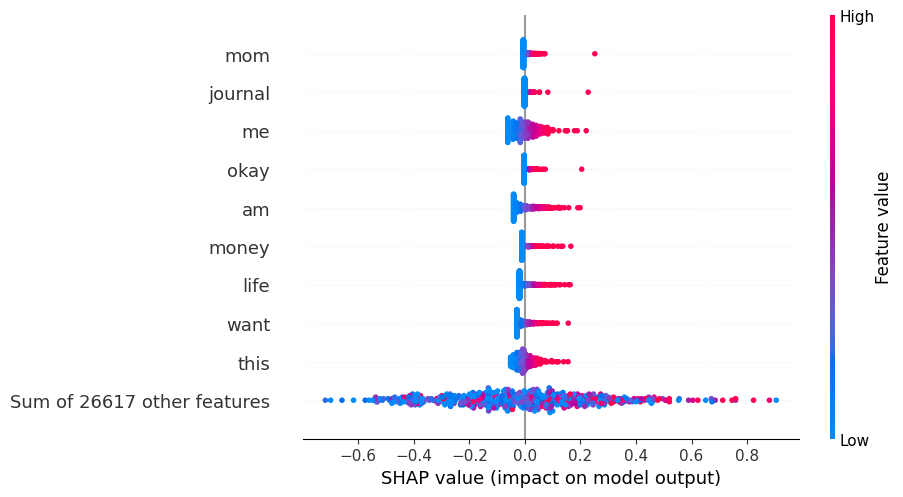

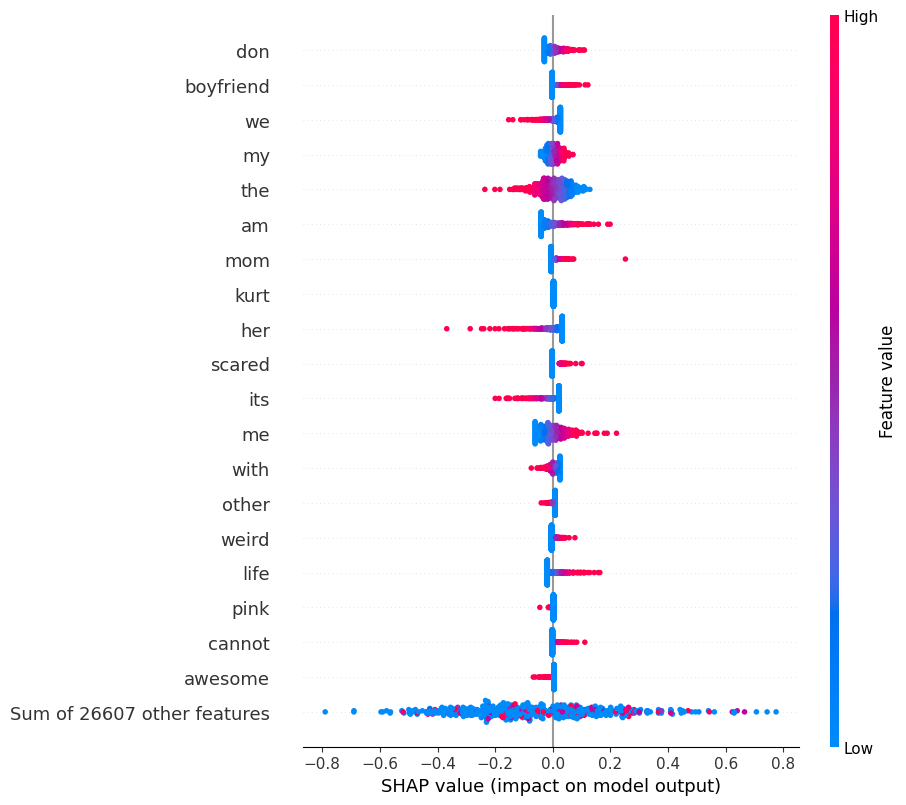

In [42]:
lr = LR(solver="liblinear")

y_train=essays_train["cNEU"]
y_test=essays_test["cNEU"]

lr.fit(X_train, y_train)

explainer = shap.Explainer(lr, X_train, feature_names=count_vectorizer.get_feature_names())
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, max_display=10, order=shap_values.min(0).argsort)
shap.plots.beeswarm(shap_values, max_display=10, order=shap_values.max(0))
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.sum(0))

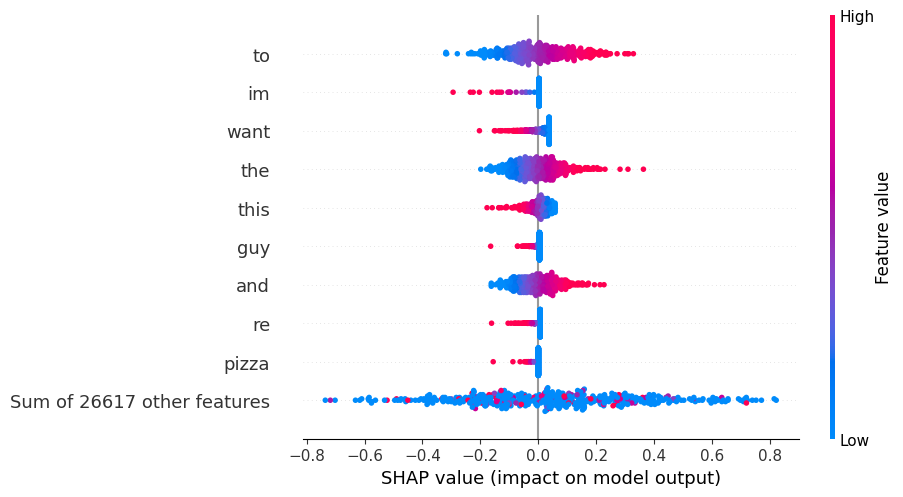

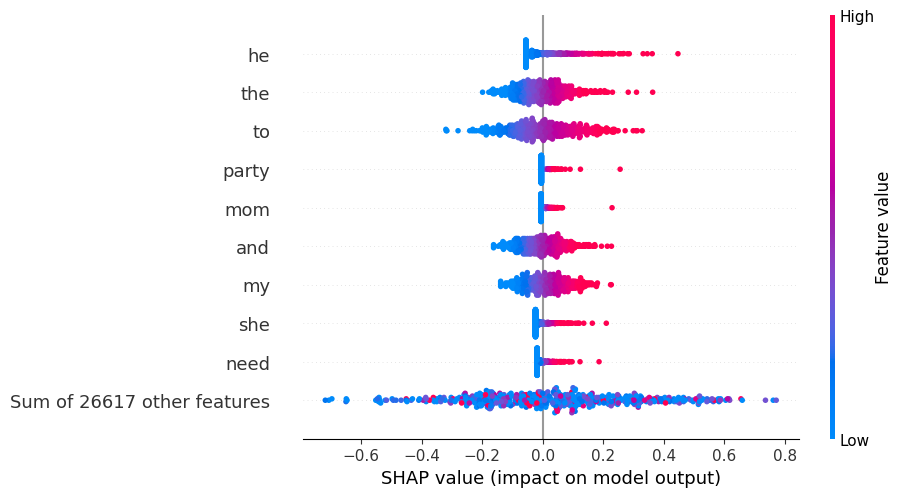

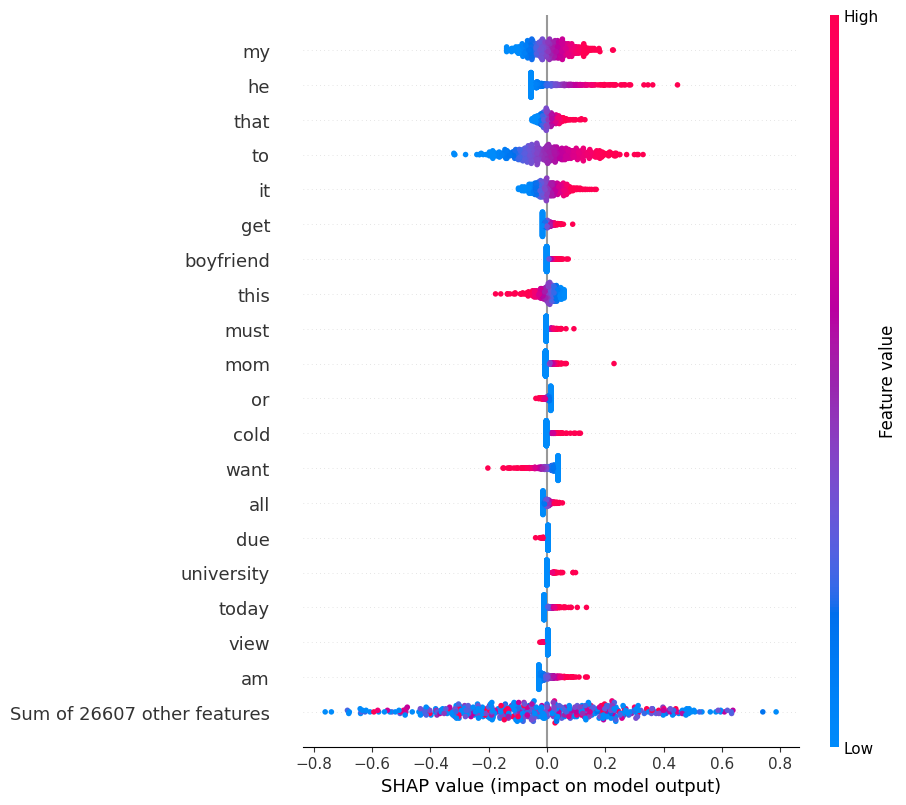

In [43]:
lr = LR(solver="liblinear")

y_train=essays_train["cCON"]
y_test=essays_test["cCON"]

lr.fit(X_train, y_train)

explainer = shap.Explainer(lr, X_train, feature_names=count_vectorizer.get_feature_names())
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, max_display=10, order=shap_values.min(0).argsort)
shap.plots.beeswarm(shap_values, max_display=10, order=shap_values.max(0))
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.sum(0))

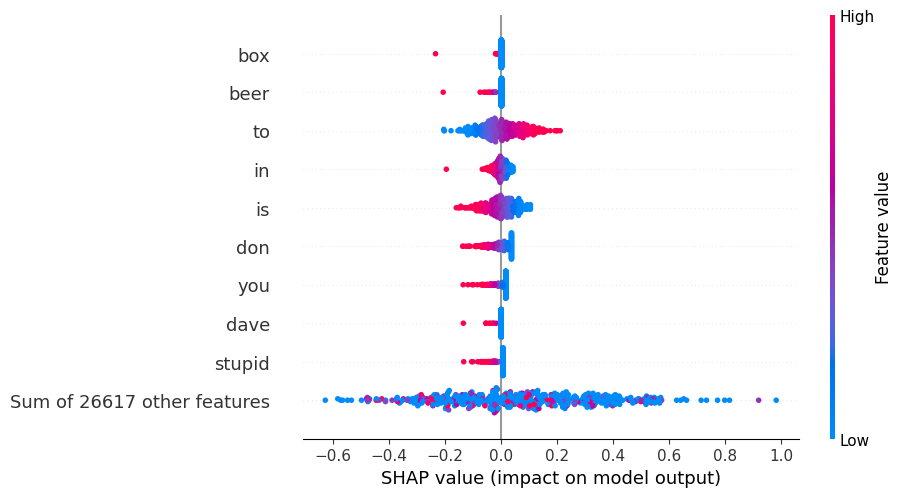

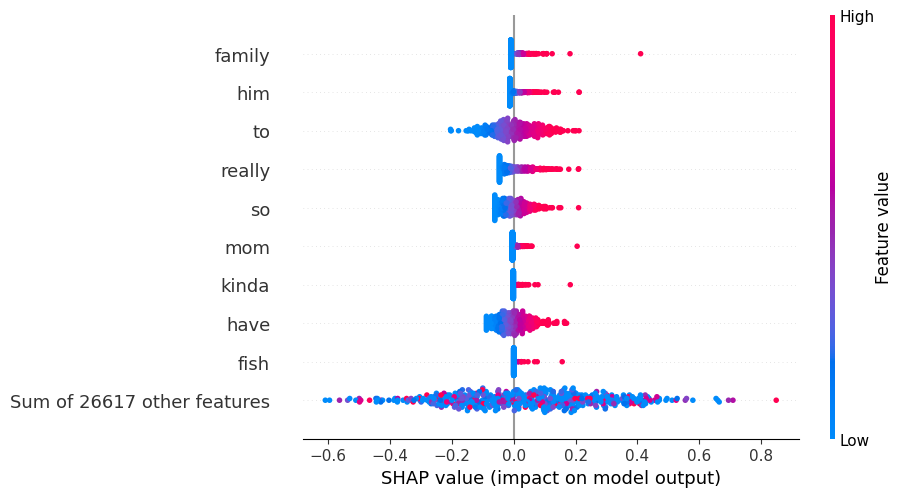

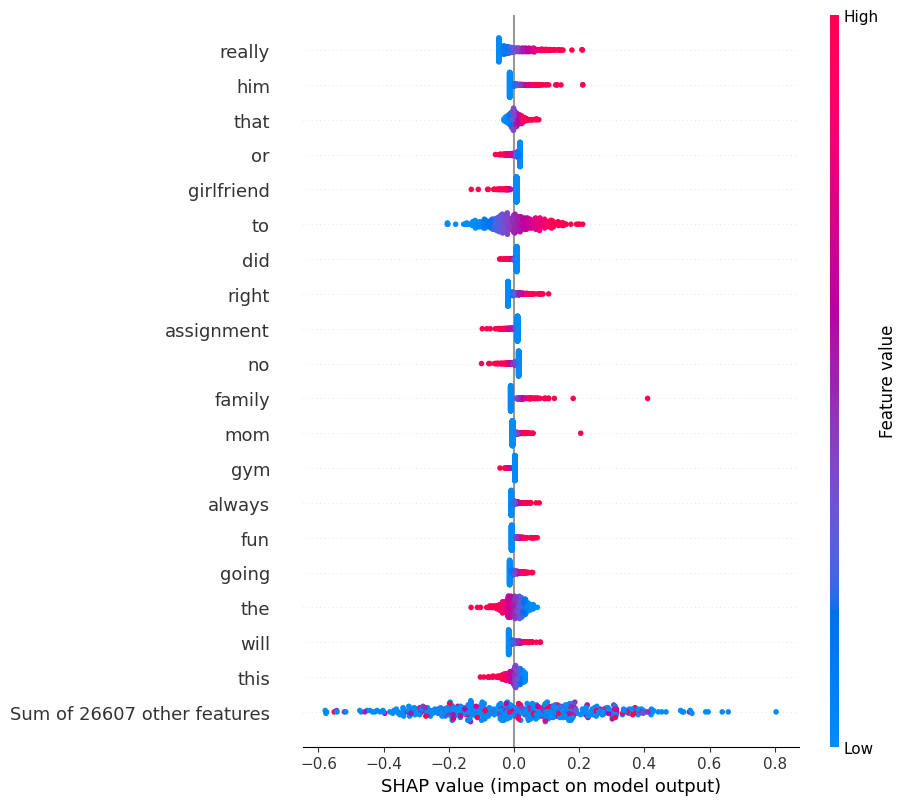

In [44]:
lr = LR(solver="liblinear")

y_train=essays_train["cAGR"]
y_test=essays_test["cAGR"]

lr.fit(X_train, y_train)

explainer = shap.Explainer(lr, X_train, feature_names=count_vectorizer.get_feature_names())
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, max_display=10, order=shap_values.min(0).argsort)
shap.plots.beeswarm(shap_values, max_display=10, order=shap_values.max(0))
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.sum(0))

## Showing results for negative classification

In [45]:
def train_lr(df_train, vectorizer, personality, lr_kwargs={"solver":"liblinear"}): #"max_iter": 1000, "solver": "lbfgs"}):
    """
    Receives the train set `df_train` as pd.DataFrame and extracts lemma n-grams
    with their correspoding labels (news type).
    The text is vectorized and used to train a logistic regression with
    training arguments passed as `lr_kwargs`.
    Returns the fitted model.
    """
    vectorizer.set_params(max_df=df_train.shape[0])
    X=vectorizer.fit_transform(df_train["TEXT"])
    model=LR(**lr_kwargs)
    model.fit(X, 1-df_train[[personality]])
    return model

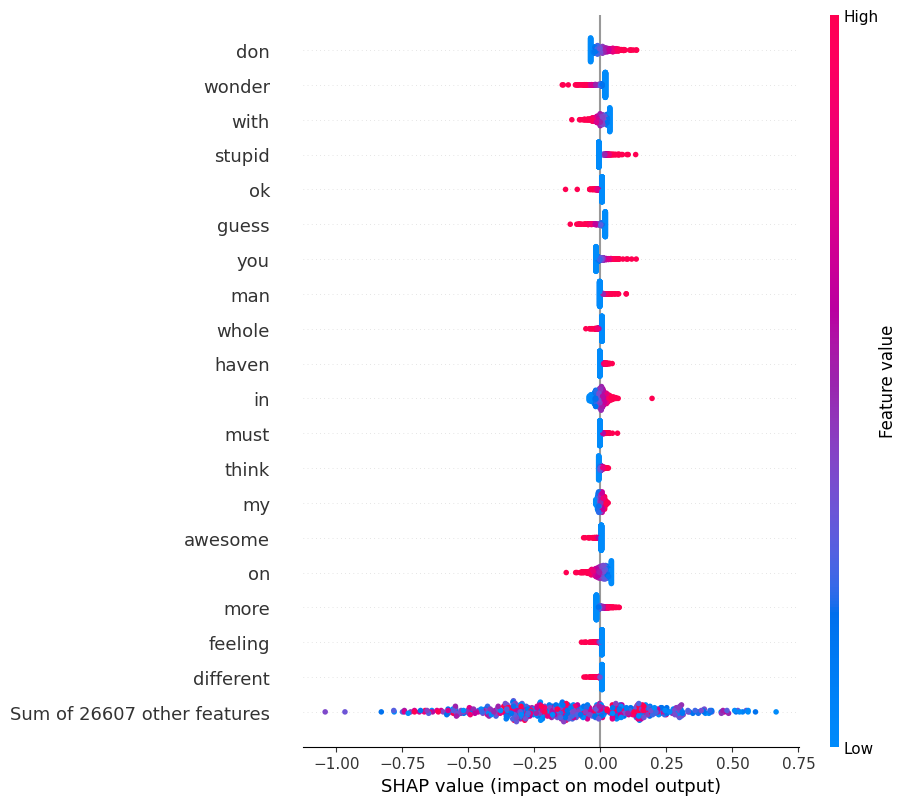

In [46]:
lr = LR(solver="liblinear")

y_train=1-essays_train["cAGR"]
y_test=1-essays_test["cAGR"]

lr.fit(X_train, y_train)

explainer = shap.Explainer(lr, X_train, feature_names=count_vectorizer.get_feature_names())
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.sum(0))

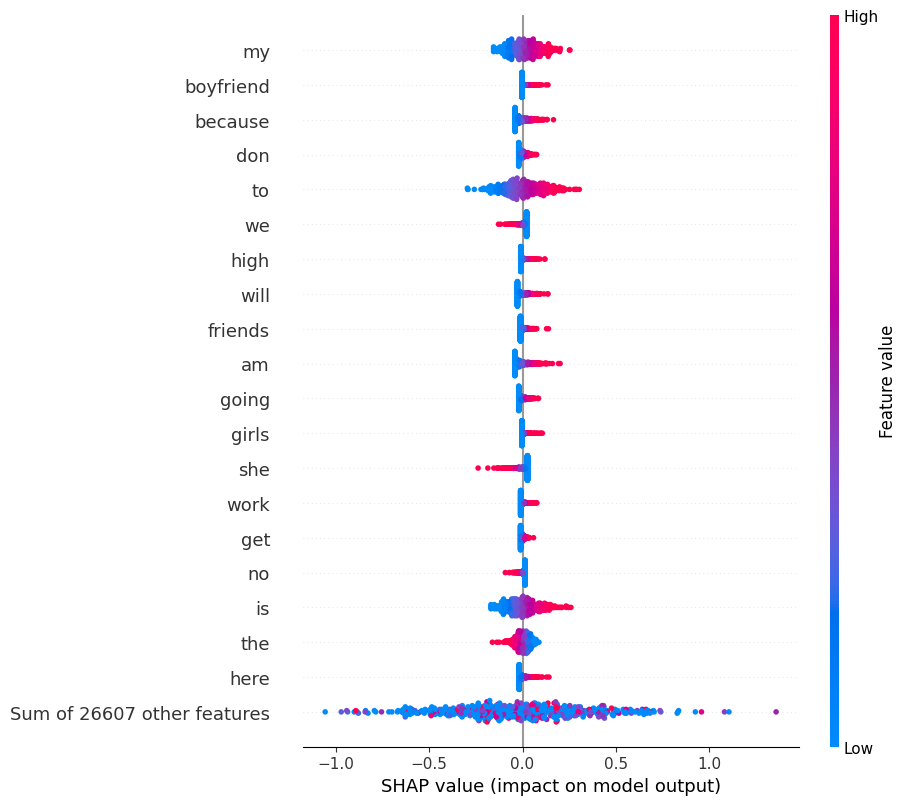

In [47]:
lr = LR(solver="liblinear")

y_train=1-essays_train["cOPN"]
y_test=1-essays_test["cOPN"]

lr.fit(X_train, y_train)

explainer = shap.Explainer(lr, X_train, feature_names=count_vectorizer.get_feature_names())
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.sum(0))

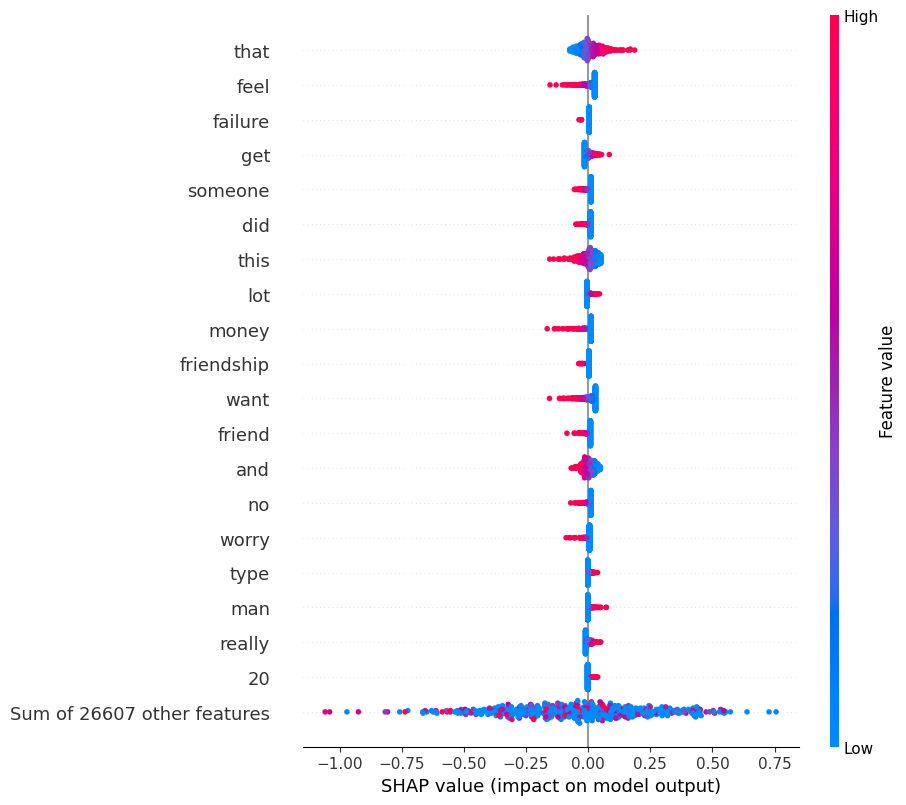

In [48]:
lr = LR(solver="liblinear")

y_train=1-essays_train["cNEU"]
y_test=1-essays_test["cNEU"]

lr.fit(X_train, y_train)

explainer = shap.Explainer(lr, X_train, feature_names=count_vectorizer.get_feature_names())
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.sum(0))

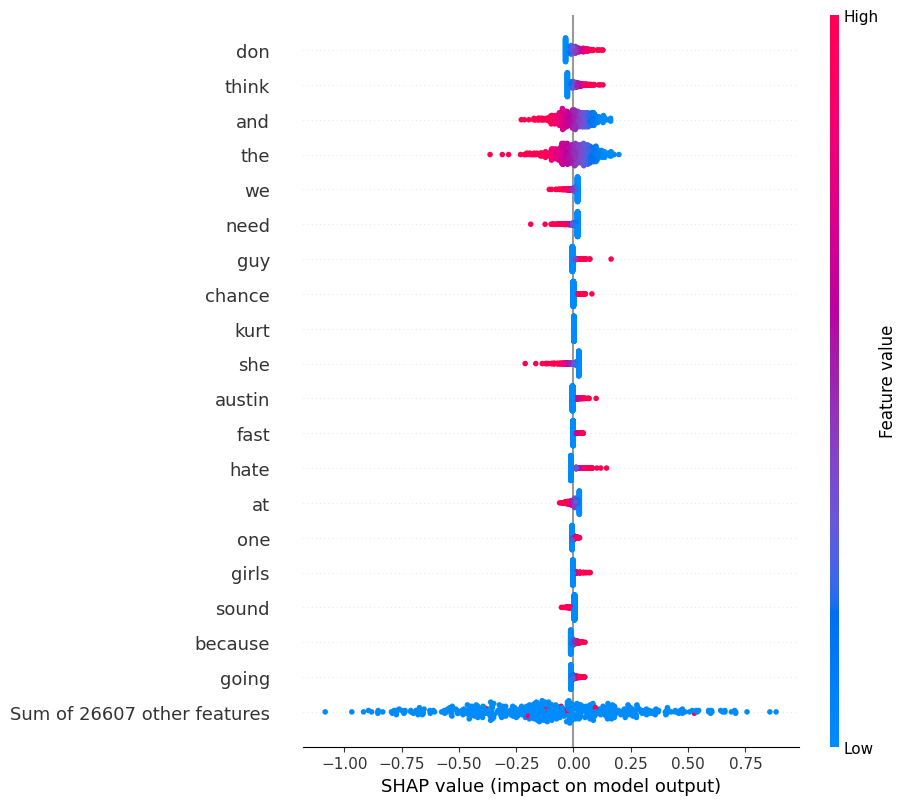

In [49]:
lr = LR(solver="liblinear")

y_train=1-essays_train["cCON"]
y_test=1-essays_test["cCON"]

lr.fit(X_train, y_train)

explainer = shap.Explainer(lr, X_train, feature_names=count_vectorizer.get_feature_names())
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.sum(0))

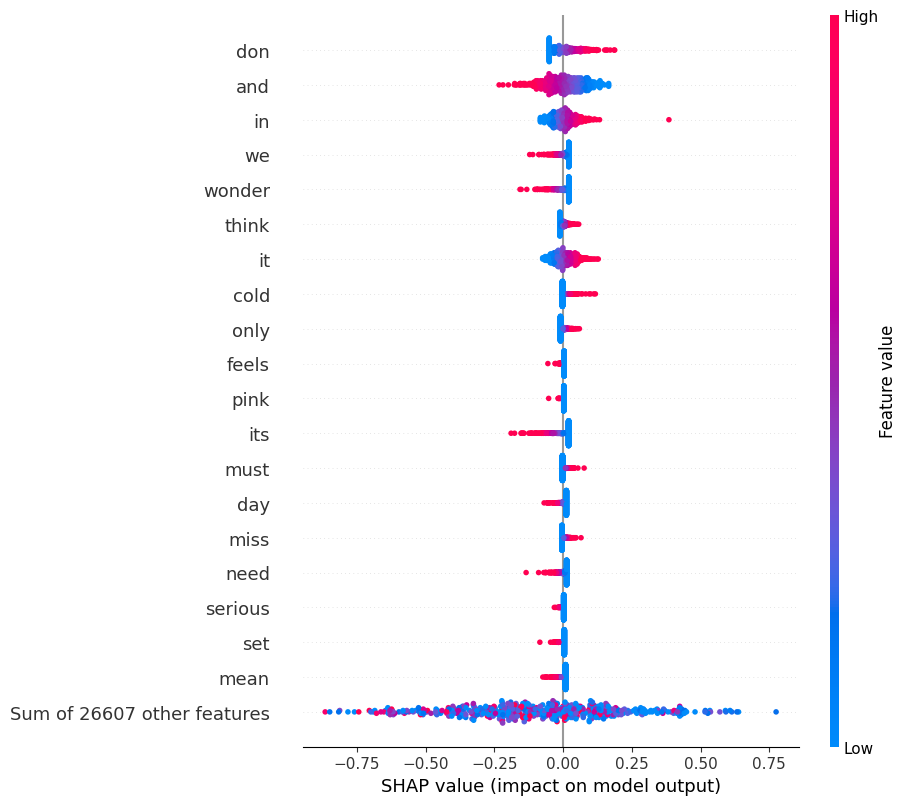

In [50]:
lr = LR(solver="liblinear")

y_train=1-essays_train["cEXT"]
y_test=1-essays_test["cEXT"]

lr.fit(X_train, y_train)

explainer = shap.Explainer(lr, X_train, feature_names=count_vectorizer.get_feature_names())
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.sum(0))